In [11]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import csv

from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../data/basic_data.csv')
data['log_closePrice'] = np.log(data['closePrice'])

In [6]:
## Find Cointegrated pairs of constant+linear regression
colint_stock_list_ct = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['log_closePrice'], stock_j_df['log_closePrice'], trend = 'ct')

        if outcome[1] < 0.05:
            colint_stock_list_ct.append(([stock_i, stock_j], outcome))

In [ ]:
#define predictor and response variables
chosendata = pd.DataFrame({'stockP':[],'stockQ':[]})
coefficient = pd.DataFrame({'stockP':[],'stockQ':[],'coefficient':[],'intercept':[]})
for j in range(len(colint_stock_list_ct)):
    for i in range(50):
        pairdata = pd.DataFrame({'stockP':[data['log_closePrice'][df.iloc[j]['stockP']*50+i]],'stockQ':[data['log_closePrice'][df.iloc[j]['stockQ']*50+i]]})
        chosendata = pd.concat([chosendata,pairdata])
    y = chosendata['stockP']
    x = chosendata['stockQ']
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coef = model.params[1]
    const = model.params[0]
    information = pd.DataFrame({'stockP':[df.iloc[j]['stockP']],'stockQ':[df.iloc[j]['stockQ']],'coefficient':[coef],'intercept':[const]})
    coefficient = pd.concat([coefficient,information])


In [7]:
## Use the 3 day moving average of cointegrated difference to approximate linear trend
WINDOW = 5

moving_avg = pd.DataFrame(columns=['stock', 'mid_date', 'avg_price'])

for stock in range(50):
    single_stock = data[data['stock'] == stock]

    for date in range(500-WINDOW):
        window = single_stock[(single_stock['date'] >= date) & (single_stock['date'] < date+WINDOW)]
        avg_price = window['closePrice'].mean()

        new_row = {'stock': stock, 'mid_date': date+(WINDOW-1)/2, 'avg_price': avg_price}
        moving_avg = pd.concat([moving_avg, pd.DataFrame([new_row])], ignore_index=True)

In [8]:
trend_moving_avg = pd.DataFrame(columns=['Pair', 'Slope', 'intercept'])

for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = moving_avg[moving_avg['stock'] == stock_i]
    stock_j_df = moving_avg[moving_avg['stock'] == stock_j]

    # Price difference df
    diff = pd.DataFrame()
    diff['difference'] = (stock_i_df['avg_price'].reset_index() - stock_j_df['avg_price'].reset_index())['avg_price']
    diff = np.array(diff['difference']).reshape(-1, 1)
    date = np.array(stock_i_df['mid_date']).reshape(-1, 1)
    
    # Fit linear regression
    LR = LinearRegression(n_jobs=-1).fit(date, diff)

    # Append new data
    new_data = {
        'Pair': [(stock_i, stock_j)],
        'Slope': [LR.coef_],
        'intercept': [LR.intercept_]
    }
    new_df = pd.DataFrame(new_data)
    trend_moving_avg = pd.concat([trend_moving_avg, new_df], ignore_index=True)

4 35


/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwt

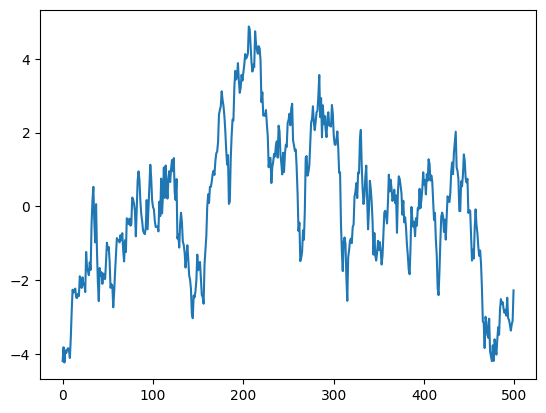

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwt

16 39


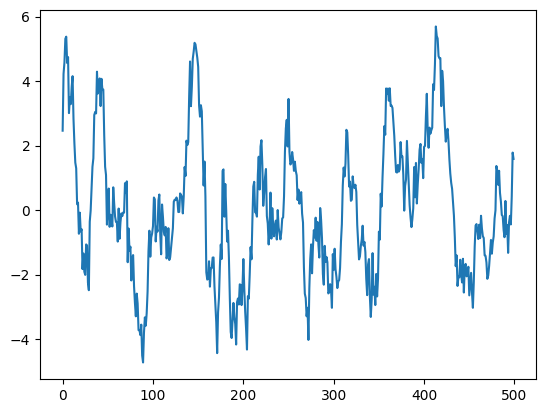

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


18 23


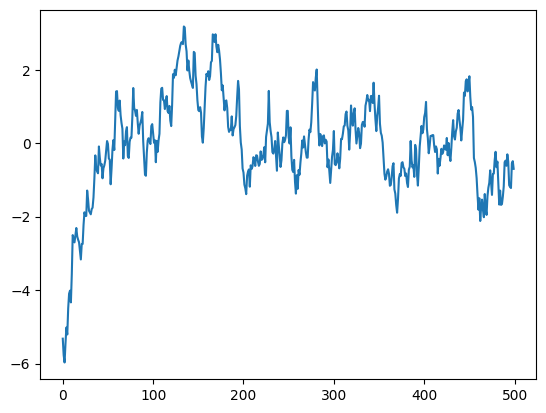

18 30


/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


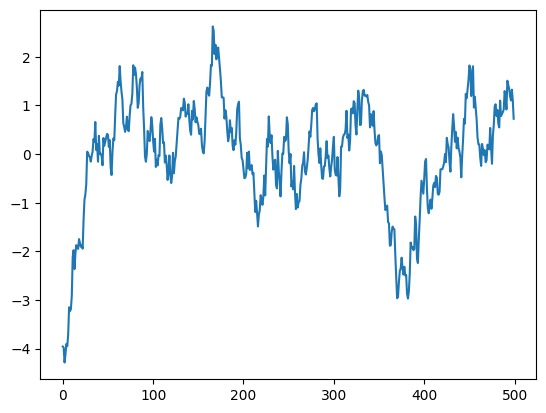

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


18 34


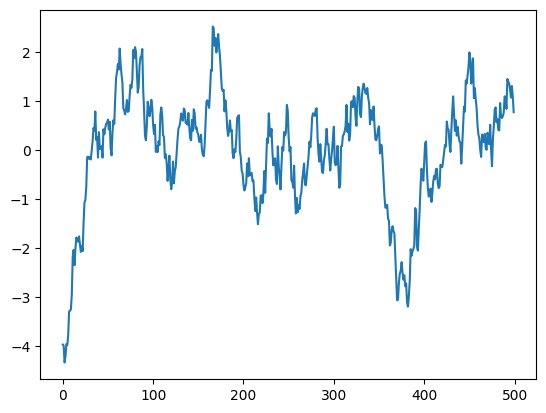

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


18 42


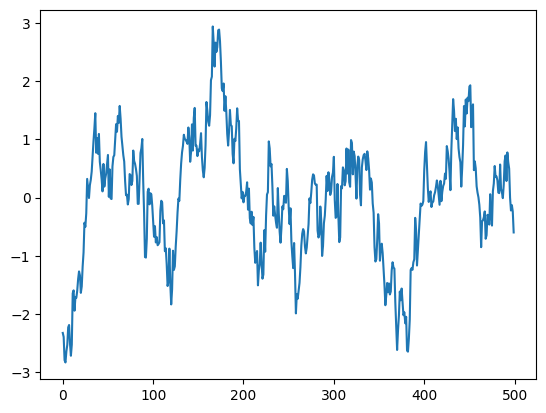

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


18 48


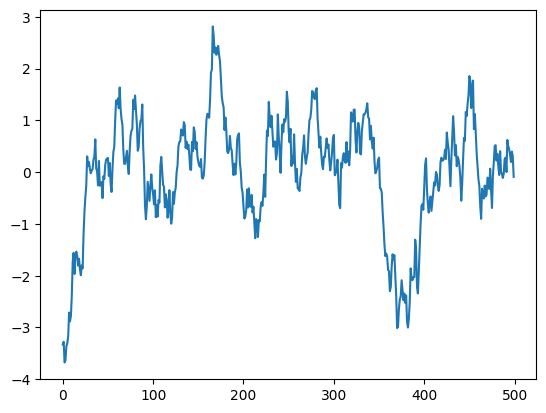

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


18 49


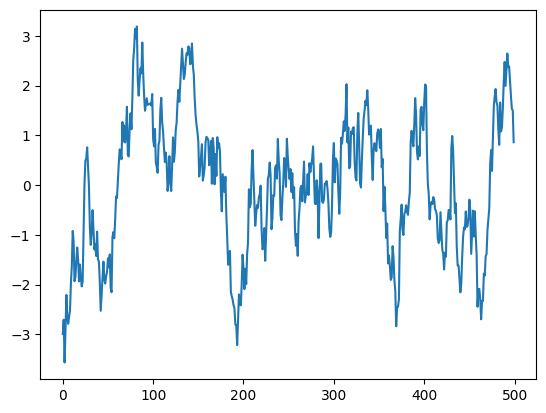

19 37


/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


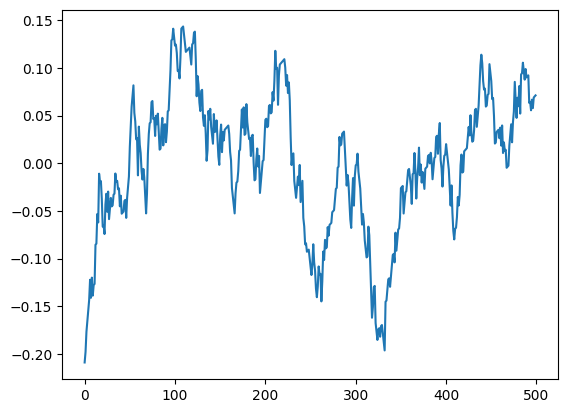

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


22 25


/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


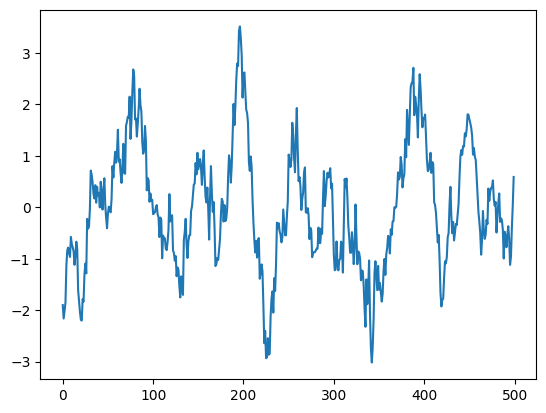

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


25 35


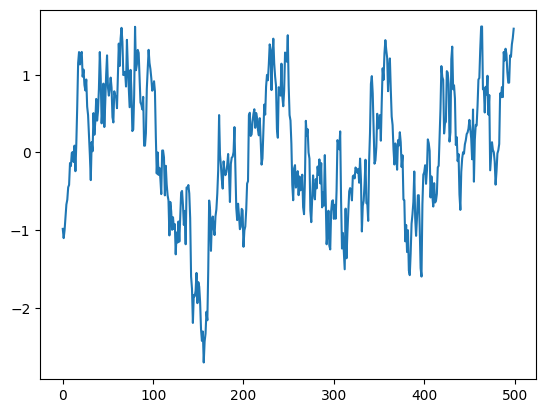

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


25 39


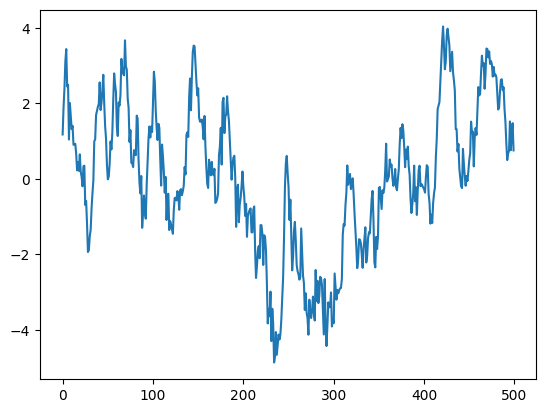

31 38


/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


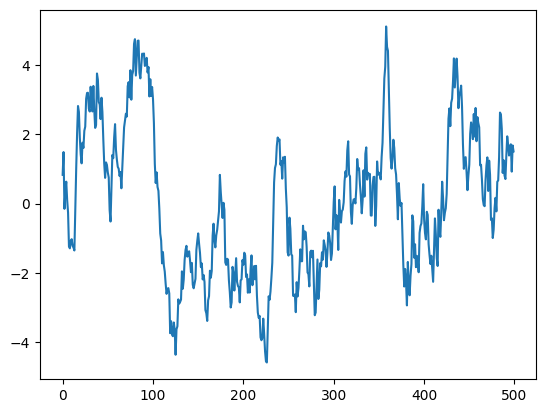

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwt

35 39


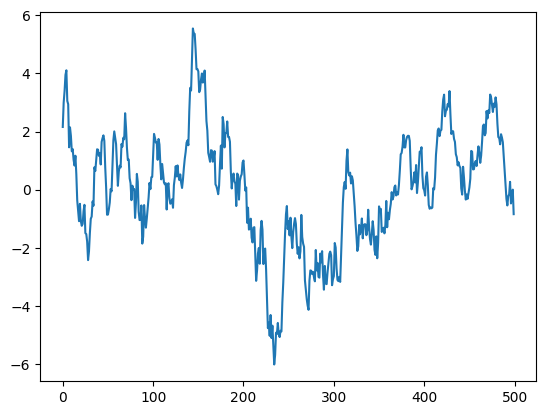

/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
/var/folders/wg/4hlcszls02vfyr1nhwtnm3q40000gn/T/ipykernel_703/3722119421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])


In [9]:
selected_pairs = pd.DataFrame(columns=["Pair", "LinearSlope", "LinearIntercept", "StandardDeviation"])

for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]
    trend_slope = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["Slope"])
    trend_intercept = float(trend_moving_avg[trend_moving_avg["Pair"] == (stock_i,stock_j)]["intercept"])

    diff = (stock_i_df['closePrice'].reset_index() - stock_j_df['closePrice'].reset_index())["closePrice"]
    dates = np.linspace(0,len(stock_i_df)-1, len(stock_i_df))
    trend = trend_slope*dates + trend_intercept
    diff = diff-trend
    
    adf = adfuller(diff)
    if adf[1] <= 0.05:
        new_data = {
            'Pair' : [(stock_i, stock_j)],
            'LinearSlope' : [trend_slope],
            'LinearIntercept' : [trend_intercept],
            'StandardDeviation' : [np.std(diff)]
        }
        print(stock_i, stock_j)      
        plt.plot(dates,diff)
        plt.show()
        new_df = pd.DataFrame(new_data)
        selected_pairs = pd.concat([selected_pairs, new_df], ignore_index=True)
    


In [10]:
selected_pairs

,Pair,LinearSlope,LinearIntercept,StandardDeviation
0,"(4, 35)",-0.026972,29.389747,1.939904
1,"(16, 39)",0.036343,-11.851669,2.144328
2,"(18, 23)",-0.010807,35.541849,1.347032
3,"(18, 30)",-0.011116,26.519588,1.141993
4,"(18, 34)",-0.007573,44.920821,1.182922
5,"(18, 42)",-0.000912,15.514760,1.052217
6,"(18, 48)",-0.000855,35.978264,1.094378
7,"(18, 49)",-0.019476,18.627155,1.353149
8,"(19, 37)",-0.001122,-16.151135,0.072218
9,"(22, 25)",-0.019459,0.281132,1.181038


In [ ]:
#!/usr/bin/env python
nInst=50
currentPos = np.zeros(nInst)
def getMyPosition (prcSoFar):
     global currentPos
     nt, nInst = prcSoFar.shape
     # Calculate the difference of selected pairs on current day
     currentPrices = prcSoFar[nt-1,:]
     # For selected pairs, calculate the price difference on the last day
     currentDiff = []
     for stock_i, stock_j in selected_pairs:
         currentDiff.append(currentPrices[stock_i] - currentPrices[stock_j])
    # Question: For OLS hedge ratio calculations, should we calculate based on removed trend series or normal series?
    
    # If the difference > 1.5sd, short stock i and buy stock j 
    # If the difference < -1.5sd, buy stock i and short stock j 
    # How do we figure out how many stocks shall we buy given 18/25 appeared in multiple stocks?
    
    # If the difference < 0.5sd and > 0, and we have previously made a movement, buy back stock i and sell j
    # If the difference > -0.5sd and < 0, and we have previously made a movement, sell stock i and buy back j
    # How to determine if we have already made a movement? Knowing when to buy back and knowing if we have already bought and keep it?
     return currentPos
